# Currently running through old lessons. 
Continue with class 8.
# Purpose

Most data science projects follow a similar structure. This notebook lays out the starting point for analysis. 

Edit as needed.

# Load libraries and data

In [10]:
# your name here
# anyone that peer-reviewed your work
# the date and main idea of your latest change
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use ggplot style everywhere
# show graphs in notebook
% matplotlib inline 

# Check out import file

In [ ]:
!head breast-cancer.csv

# Load from CSV

In [ ]:
# names = ['id', 'title', 'year', 'score', 'votes', 'length', 'genres']`
# data = pd.read_csv('../imdb_top_10000.txt', sep='\t', names=names, index_col=0)
# convert the y values into 0,1
cancer['diagnosis'] = pd.factorize(cancer['diagnosis'])[0]

# Load from API

In [13]:
import requests
from time import sleep

In [14]:
# use requests library to interact with a URL
r = requests.get('http://www.omdbapi.com/?t=the shawshank redemption&r=json&type=movie')
# check the status: 200 means success, 4xx means error
r.status_code

200

In [ ]:
# view the raw response text
r.text

In [ ]:
# decode the JSON response body into a dictionary
r.json()

In [ ]:
# extracting the year from the dictionary
r.json()['Year']

# Explore features

In [ ]:
# Display a few rows
data.head()

In [ ]:
# look at dtypes, row numbers for missing
data.info()

In [ ]:
# look at a summary of the data
data.describe()

In [ ]:
# Check for high correlation
data.corr()

In [ ]:
# do we have any missing data?
train.isnull().any()

In [ ]:
# show what's inside a categorical
data.label.value_counts()

## Visualize
[Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the pandas .plot function.

## Pandas

In [ ]:
# graph data
imdb.plot(kind='scatter', x='score', y='votes', 
          ylim=(0, 600000), alpha=0.1, title='Comparing Score and Votes');
aapl['Close'].plot();
# rule of thumb: if you see weird artifacts, try renaming
aapl.index.name = 'Date'
aapl['Close'].plot();
imdb['score'].plot(kind='hist');

# Set the global default size of matplotlib figures to 10 inches wide by 5 inches tall
plt.rc('figure', figsize=(10, 5))

## Matplotlib

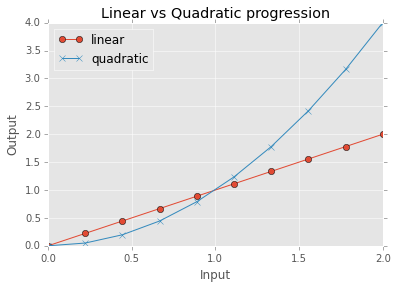

In [11]:
# matplotlib

# drawing lines
x = np.linspace(0, 2, 10)

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');

In [ ]:
# drawing histograms
plt.hist(imdb['score']);

# drawing 2 histograms on same plot
# make sure bins are the same size
# use the alpha argument
bins = np.linspace(1, 9, 20)
plt.hist(imdb[imdb['year']<2000]['score'], bins=bins, alpha=0.2, label='Before 2000')
plt.hist(imdb[imdb['year']>2000]['score'], bins=bins, alpha=0.8, label='After 2000')
plt.legend(loc='best')
;

In [ ]:
# drawing scatters
plt.scatter([1,2,3,4], [2.5, 3, 3.1, 5], s=200);

# adding annotation
plt.annotate('some text', xy=(0.5,0.5), xytext=(0.5, 0.6), arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='center', verticalalignment='center');

In [ ]:
# drawing parallel lines
plt.figure()
pd.tools.plotting.parallel_coordinates(train, 'Species');

In [ ]:
# bar chart
data.label.value_counts().plot(kind='bar')

In [ ]:
# multiple figures in a window
# create a new figure that's 4x3
# this figure is assigned to figure 1
# this is handy because it means we can
# easily put multiple charts in one window
# and switch between them
plt.figure(1, figsize=(4, 3));
plt.plot([1,2,3,4])
# create a new figure and switch to it
plt.figure(2, figsize=(5, 3));
plt.scatter([1,2,3,4], [1,2,3,4])
# switch back to 1
plt.figure(1)
plt.plot([9,10])
# create a third
plt.figure(3, figsize=(5, 3));
plt.scatter([1,2,3,4], [1,2,3,4])

## Seaborn

In [ ]:
import seaborn as sns
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

# categorical feature, with jitter added
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

# bar chart
sb.factorplot(x='is_news', 
               y='label',
               kind='bar',
              data = data)

# totals
p = sb.factorplot(x='alchemy_category', 
              y='label',
              kind='bar',
              data = data,
              size = 8,
              estimator=len
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

# show all variables, with categorical outcomes in different shades
g = sns.pairplot(pima_diabetes_no_tests, hue="diabetic", palette="Set2", diag_kind="kde", size=2.5)

# Look for specific data

In [ ]:
# comparison to sql operations: http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

In [ ]:
# specific columns
data['year'][0:20]

In [ ]:
# What was the highest movie between 1970 and 2005?
data[(data.year < 1970) | (data.year > 2005)].head(20).sort_values(by='score')

In [ ]:
# What year in the 60's had the highest score?
data[(data.year >= 1960) & (data.year <= 1969)].groupby(data.year).score.max().sort_values().tail(1)

# Fill in / drop missing data

In [1]:
# now our data has no missings
data = data.dropna()

# drop data with na in particular columns
df2.dropna(subset=['three', 'four', 'five'], how='all')

# fill with mean
df.fillna(df.mean())

NameError: name 'data' is not defined

# Treat outliers

# Modify data

In [4]:
# multiply everything 
data['score'].apply(lambda x: x*10).head()

# right 6
some_string = 'The Shawshank (2014)'
some_string[-6:]

# split data
some_splitting = 'Crime|Action|Drama'
some_splitting.split('|')

# remove the right 6
#data['title'] = data['title'].str[0:-7]

# remove a string from end
# data['length'] = data['length'].str.split(' mins.').apply(lambda x: x[0])

# change to int
#data['length'] = data['length'].astype('int')

# pull columns
X, y = train.iloc[:, :-1], train.iloc[:, -1]

# now we need to convert our label to a categorical variable for the model
pd.factorize(data['label'])

# pull json title from boilerplate field
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))

# mean using groupby
print data.groupby(['alchemy_category'])[['label']].mean()

# I don't like dashes
data.columns = [x.replace('-', '_') for x in data.columns]

# get dummies for categorical
example = pd.get_dummies(example).drop(['sex_ Male', 'race_ Other'], axis=1)

NameError: name 'data' is not defined

# Split into test / training data

## Reserve test data
Pull out data before you look for algorithms, optimize parameters, treat outliers, etc. It is legitimate to drop nulls first.

In [ ]:
# be careful when splitting time series!
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales', axis=1), data['Sales'],
                                                    test_size=0.2, random_state=7)

# Standardize
Bring all features to same scale - especially important with distance algorithms like kNN

In [ ]:
# standardization: bring all of our features onto the same scale
# this makes it easier for ML algorithms to learn
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

## Shuffle split the training data
Provides many sets of data for cross-validation of algorithms

In [15]:
# 10 cross validation iterations with 20% test / 80% train
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

NameError: name 'data' is not defined

# Analyze data
We have many stats algorithms available for different purposes

## Primary Component Analysis (PCA)
Reduce dimensions before clustering or analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9, whiten=True)
pca.fit(faces_centered)

## Linear regression

In [ ]:
# Linear regression - simplest model
%%timeit # times cell
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# fit the model
lr.fit(X, y)
# create a dataframe to show our coefficients
d = {'features': X.columns, 'coefficients': lr.coef_}
pd.DataFrame(d)

### Lasso

In [ ]:
# Lasso - linear model with L1 regularization drops meaningless coefficients to zero
# Good interpretability - similar to stepwise regression
%%timeit # times cell
from sklearn.linear_model import Lasso
parameters = {'alpha': np.linspace(1,10,20)}
lasso = Lasso(normalize=True)

### Ridge

In [ ]:
# Ridge - linear model with L0 regularization makes some coefficients very small
# Slightly more accurate than lasso, but less interpretable
%%timeit # times cell
from sklearn.linear_model import Ridge
parameters = {'alpha': np.linspace(1,10,20)}
ridge = Ridge(normalize=True)

## Logistic regression

In [ ]:
%%timeit # times cell
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

## k Nearest Neighbors

In [ ]:
# k nearest neighbors 
%%timeit # times cell
from sklearn.neighbors import KNeighborsClassifier
# starting with k=1
# this creates the classifier
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
# execute this to fit the classifier to our data
knn.fit(X, y)
# execute this to predict the labels for our "unseen" test data
knn.predict(test)

## Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# let's look at a simple example
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE!']
train_labels = ['not_desperate',
                'not_desperate',
                'desperate']
# ignore in case ppl used weird text like smileys or foreign languages
vect = CountVectorizer(decode_error='ignore')
vect.fit(train_simple)
vect.get_feature_names()
# by default CountVectorizer does ngram of 1
# we'll use unigrams for the rest of this exercise

# transform to make ready for dataframe
vect_trans = vect.transform(train_simple)
# let's look at the dataset
vect_trans.toarray()
# put it all in a dataframe
df = pd.DataFrame(vect_trans.toarray(), columns=vect.get_feature_names())
# now let's add the labels
df['labels'] = train_labels

from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score
# becareful since labels is a special name in pandas
y, X = df['labels'], df.drop(['labels'], axis=1)
nb = MultinomialNB()
nb.fit(X, y)

# gaussian - when there's a normal distribution
nb = GaussianNB()
nb.fit(X_train_neither, y_train_neither)

## Decision tree

In [ ]:
%%timeit # times cell
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

# this looks too good to be true!

model.score(X, y)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

## Support vector machine

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma=0.01)
clf.fit(X_train, y_train)
# might need to use coefficient parameter too
# maybe more kernels
params = {'C': np.linspace(.001, 10, 10), 'kernel': ['poly', 'rbf'],
         'degree': range(1,4), 'gamma': np.linspace(.001, 10, 10)}
clf = SVC()
grid = GridSearchCV(clf, params, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

## Term Frequency - Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import 
TfidfVectorizer vectorizer = TfidfVectorizer()

## Natural language processing

In [ ]:
from spacy.en import English
nlp_toolkit = English()
title = u"IBM sees holographic calls, air breathing batteries"
parsed = nlp_toolkit(title)
for (i, word) in enumerate(parsed):
    print("Word: {}".format(word))
    print("\t Phrase type: {}".format(word.dep_))
    print("\t Is the word a known entity type? {}".format(word.ent_type_ if word.ent_type_ else "No"))
    print("\t Lemma: {}".format(word.lemma_))
    print("\t Parent of this word: {}".format(word.head.lemma_))

# Optimize parameters

In [ ]:
# gridsearch for hyperparameters
from sklearn.grid_search import GridSearchCV
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf = GridSearchCV(knn, parameters, cv=cv)
clf.fit(X_train_std, y_train)

import numpy as np
from sklearn.grid_search import GridSearchCV
# gridsearch for hyperparameters
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

In [ ]:
# get the best performing combo
clf.best_params_

In [ ]:
# get a list of all the combo scores
clf.grid_scores_

In [ ]:
best_knn = clf.best_estimator_

# Measure performance
Learning curves not only show how well you're doing, but may provide hints on improvements.
- Increasing slope on right indicates high variance (cure with less complexity or more data)

In [ ]:
# do with low k and high k to show high var / high bias
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_knn, X_train_std, y_train, cv=cv)

# mason's code for simpler learning curves
!pip install sk_modelcurves
from sk_modelcurves.learning_curve import draw_learning_curve

lasso = Lasso(alpha=10)
draw_learning_curve(lasso, X_reg, y_reg, scoring='mean_squared_error');
knn = KNeighborsClassifier(n_neighbors=2)
draw_learning_curve(knn, X_clf, y_clf, scoring='precision', cv=5);

# multiple curves
knn5 = KNeighborsClassifier(n_neighbors=5)
knn50 = KNeighborsClassifier(n_neighbors=50)


# must specify estimator_titles
draw_learning_curve([knn5, knn50], X_clf, y_clf, estimator_titles=['kNN with 5', 'kNN with 50'], cv=5,
                   scoring='accuracy')
# make the plot bigger
fig = plt.gcf()
fig.set_size_inches(8, 8)

## K-means clustering

In [2]:
from sklearn.cluster import KMeans
km = KMeans(3)
km.fit(X_scale)
km.inertia_

## Find elbow for grouping

In [ ]:
# look for the elbow!
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,20):
    km2 = KMeans(n_clusters=n)
    km2.fit(X_scale)
    x.append(n)
    y.append(km2.inertia_)
plt.plot(x, y)

## Scoring performance

In [ ]:
# okay cool, so how good is our model?
best_knn.score(X_test_std, y_test)

# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

# minimum performance

# dummyclassifier
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
# or we can calculate the majority by ourselves
# remember to do this on the train data
cancer['diagnosis'].value_counts() / cancer.shape[0]

In [ ]:
# use classification report to find performance on each digit
from sklearn.metrics import classification_report
print classification_report(clf.predict(X_test), y_test)

# Summary
Evaluate models on accuracy, interpretability, and performance - as appropriate